### Final Project Skeleton Code
This notebook is meant to be skeleton code for the final project. We have filled in the code to allow you to download the dataset and train your neural network on it. We have not made the neural network for you. All of the specifics, including layer sizes and hyperparameters, are up to you to decide. Some of this code may not work perfectly for you, so you will have to read it and understand what is going on so that you can create your neural network. The testing cell at the end is how we will be testing your neural networks, so be sure that whatever you do, it works with that cell. (For example: do any data processing such as flattening and padding in the forward function rather than in the testing loop as we will not be editing our testing loop to reflect any of those changes)

In [1]:
!pip install torch

### Import Libraries

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Download training and testing data

In [3]:
#The line below gets the dataset and downloads it into the specified path
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
dataset = torchvision.datasets.MNIST('PATH_FOR_TRAINING_SET', download=True, train=True, transform=transform) # consider how to separate this into multiple datasets

#PyTorch uses dataloaders which you can learn about here: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
#This is a convenient module for training, it automatically prepares your data for training with a given batch size.
#The shuffle argument will automatically randomize the order of your data (but will keep inputs with associated outputs!)
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 64, shuffle = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 52.6MB/s]


Extracting PATH_FOR_TRAINING_SET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 4.34MB/s]

Extracting PATH_FOR_TRAINING_SET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.2MB/s]


Extracting PATH_FOR_TRAINING_SET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.96MB/s]

Extracting PATH_FOR_TRAINING_SET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw



### Create dataloaders and visualize some examples

torch.Size([64, 1, 28, 28])
torch.Size([64])


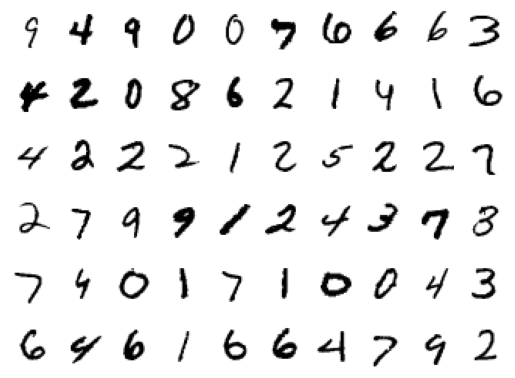

In [4]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


### Model Initialization

In [6]:
#This is your neural network class, so it must extend nn.Module
#For your final submission you will be submitting this cell as its own file
class Digit_Classifier(nn.Module):
  def __init__(self):
    #Handle some under-the-hood PyTorch stuff
    super().__init__()
    #Now put your layers below in addition to any other member variables you need
    #lowkey not finished and also lowkey prolly doesnt work so yeah
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(7 * 7 * 64, 128)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    #Now here you add your forward pass, e.g. how the layers fit together
    #Tips:
    # 1. Don't forget the ReLU layer when needed
    # 2. Consider normalization
    # 3. If you are getting errors look at your dimensions, dimension errors are very easy to make!
    # 4. CNN layers take in rectangular (or square) inputs and give rectangular (or square) outputs. Fully connected layers have input and output that are vectors, when you need to switch between the two consider using a flatten or reshape
    # x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.conv1(x)
    x = self.bn1(x)
    x = F.relu(x)
    x = self.pool(x)

    #x = self.pool(F.relu(self.bn2(self.conv2(x))))
    x = self.conv2(x)
    x = self.bn2(x)
    x = F.relu(x)
    x = self.pool(x)

    # x = x.view(-1, 7 * 7 * 64)
    # x = x.detach().numpy()
    # x = np.reshape(x, (-1, 7*7*64))
    x = x.detach().numpy()
    x = np.reshape(x, (-1, 7*7*64))
    x = torch.tensor(x)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

  #Optional: any other member functions that you think would be helpful

In [7]:
#Instantiate your model:
model = Digit_Classifier()

### Hyperparameters Tuning

In [8]:
#hyperparameters: currently all are set to 1, it is up to you to figure out what they should be
#Don't just randomly change the hyperparameters: consider what each of them are changing (look in the code to find where the actually affect things)
num_epochs = 5
learning_rate = 0.001
momentum = 0.9
criterion = nn.CrossEntropyLoss() #consider using these loss functions: https://pytorch.org/docs/stable/nn.html#loss-functions
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) #consider using these optimizers: https://pytorch.org/docs/stable/optim.html#algorithms

### Model Training

In [9]:
model.train()
all_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for images, labels in trainloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        criterion = nn.CrossEntropyLoss()
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / len(trainloader)
    all_losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/5], Loss: 0.4875
Epoch [2/5], Loss: 0.2091
Epoch [3/5], Loss: 0.1609
Epoch [4/5], Loss: 0.1343
Epoch [5/5], Loss: 0.1205


### Save your model

In [11]:
#Save your model weights (this will generate a file that you will have to submit to us)
torch.save(model.state_dict(), 'team3_final_weights.pth')

### Evaluate Test Accuracy

In [14]:
test_dataset = torchvision.datasets.MNIST('PATH_FOR_TEST_SET', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [15]:
model.eval()
correct = 0
total = 0

# Ensure gradients won't be computed (evaluation mode)
with torch.no_grad():
    for images, labels in testloader:
        for i in range(len(labels)):
            # Add batch dimension for single image
            single_image = images[i].unsqueeze(0)  # Shape: [1, channels, height, width]

            # Calculate the output
            output = model(single_image)  # Shape: [1, num_classes]

            # Get the predicted label
            _, predicted_label = torch.max(output, 1)  # Shape: [1]

            # Update correct and total counts
            if predicted_label.item() == labels[i].item():
                correct += 1
            total += 1

# Print the accuracy
print("Test accuracy: ", correct / total)
print(total)

Test accuracy:  0.9765
10000
